### Desafío 1. Determinantes del ingreso

<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


## Hito 1

### Preliminares
#### Descripción del problema y objetivos
* Se desea obtener la probabilidad que un individuo presente salarios por sobre los 50.000 dólares anuales en base a una serie de atributos sociodemográficos.
* El tipo de problema a resolver es de clasificación.
* El objetivo de este trabajo es desarrollar un modelo predictivo para obtener la probabilidad que un individuo presente salarios por sobre los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

#### Descripción de la solución
* Se realizará un análisis descriptivo sobre las diferentes variables sociodemográficas.
* Se eliminarán valores nulos.
* Se recodificarán las variables de acuerdo a lo indicado en "Aspectos adicionales a considerar".
* Se estandarizaran las variables que correspondan.
* Se construirá un modelo descriptivo de regresión logística que considere a todas las variables sociodemográficas. En base a este modelo se determinarán las variables más significativas para explicar la variabilidad del resultado, connsiderando el estadístico y p-value.
* Se construirá un modelo predictivo de regresión lineal que considere las variables resultantes del modelo descriptivo anterior. El modelo será entrenado con un 67% de los datos y validado con el 33% de estos. El modelo será evaluado de acuerdo a las métricas de precision, recall y f1. Además se hará uso de la curva ROC para complementar la evaluación del modelo.
* En base a la evaluación anterior se establecerán las conclusiones.

### Aspectos computacionales
#### Descripción de librerías y módulos
Se usarán las siguientes librerías y módulos por cada etapa de la construcción del modelo:
* ingesta: pandas
* preprocesamiento: pandas, numpy, missingno
* visualización: matplotlib, seaborn
* modelación: statsmodels.api, statsmodels.formula.api, sklearn.preprocessing, sklearn.linear_model, sklearn.model_selection
* métricas de evaluación: sklearn.metrics

## Hito 2

### Descripción

#### Se importa la BD y se imprimen las primeras 5 filas a modo de ejemplo

In [203]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo

# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv('income-db.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Se realiza la inspección visual del vector objetivo
* La BD cuenta con un 24% de los datos correspondientes a personas con un ingreso anual mayor a 50000 y el 76% restante a personas con un ingreso menor a 50000.

In [180]:
df['income'].value_counts('%')

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

#### Se realiza la inspección visual de las variables contínuas

In [181]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Se realiza la inspección visual de las variables categóricas
* En la variable workclass la categoría Private abarca un 70% de los datos
* En la variable race la categoría White abarca un 86% de los datos
* En la variable gender la categoría Male abarca un 67% de los datos
* En la variable native-country la categoría United-States abarca un 90% de los datos

In [182]:
for var in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    print(var)
    print(df[var].value_counts('%'))

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
marital-status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Na

#### Se calcula y grafica la correlación de las variables
* Al graficar la correlación se observa que no existe una correlación significativa entre las variables

In [183]:
corr_mat = df.corr()
corr_mat

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


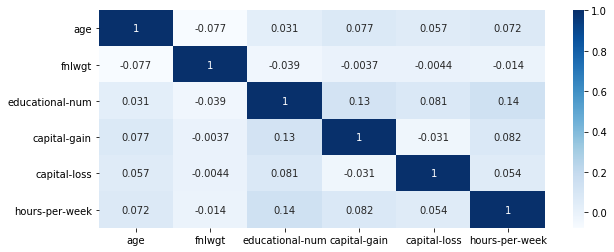

In [184]:
plt.figure(figsize = (10, 4))
sns.heatmap(corr_mat, cmap='Blues', annot=True)

#### Se inspeccionan los datos perdidos de la BD
* Se observa que las variables workclass, occupation y native-country presentan la mayor cantidad de datos perdidos.

age 0.0
workclass 0.057
fnlwgt 0.0
education 0.0
educational-num 0.0
marital-status 0.0
occupation 0.058
relationship 0.0
race 0.0
gender 0.0
capital-gain 0.0
capital-loss 0.0
hours-per-week 0.0
native-country 0.018
income 0.0


<Figure size 288x288 with 0 Axes>

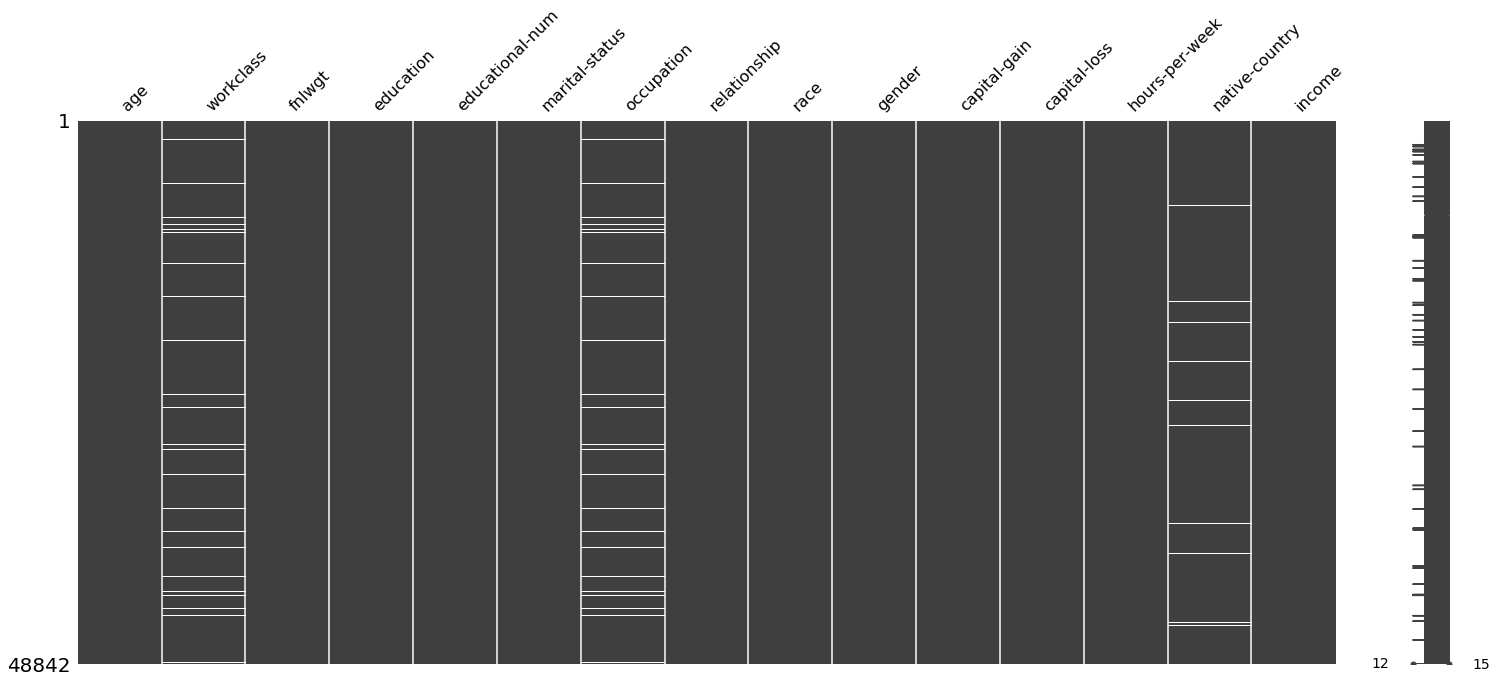

In [185]:
df = df.replace(["?"], [np.nan])
for colname, serie in df.iteritems():
    if serie.isna().value_counts('%')[False] == 1.0:
        print(colname, 0.0)
    else:
        print(colname, serie.isna().value_counts('%')[True].round(3))
        
plt.figure(figsize=(4,4))
msngo.matrix(df)

#### Se realiza la recodificación de las variables
* Para el caso de workclass Private se crea una categoría llamada private
* Para el caso de marital-status Never-married se crea una categoría never-married

In [186]:
df['collars'] = np.nan
df['workclass_recod'] = np.nan
df['educ_recod'] = np.nan
df['civstatus'] = np.nan
df['region'] = np.nan

df['collars'] = np.where(
    df['occupation'].isin(
        ['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support']
    ), 'white-collar', df['collars'])

df['collars'] = np.where(
    df['occupation'].isin(
        ['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']
    ), 'blue-collar', df['collars'])

df['collars'] = np.where(
    df['occupation'].isin(
        ['Other-service', 'Armed-Forces']
    ), 'others', df['collars'])

df['workclass_recod'] = np.where(
    df['workclass'].isin(
        ['Private']
    ), 'private', df['workclass_recod'])

df['workclass_recod'] = np.where(
    df['workclass'].isin(
        ['Federal-gov']
    ), 'federal-gov', df['workclass_recod'])

df['workclass_recod'] = np.where(
    df['workclass'].isin(
        ['State-gov', 'Local-gov']
    ), 'state-level-gov', df['workclass_recod'])

df['workclass_recod'] = np.where(
    df['workclass'].isin(
        ['Self-emp-inc', 'Self-emp-not-inc']
    ), 'self-employed', df['workclass_recod'])

df['workclass_recod'] = np.where(
    df['workclass'].isin(
        ['Never-worked', 'Without-pay']
    ), 'unemployed', df['workclass_recod'])

df['educ_recod'] = np.where(
    df['education'].isin(
        ['Preschool']
    ), 'preschool', df['educ_recod'])

df['educ_recod'] = np.where(
    df['education'].isin( 
        ['1st-4th', '5th-6th']
    ), 'elementary-school', df['educ_recod'])

df['educ_recod'] = np.where(
    df['education'].isin(
        ['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad']
    ), 'high-school', df['educ_recod'])

df['educ_recod'] = np.where(
    df['education'].isin(
        ['Assoc-voc', 'Assoc-acdm', 'Some-college']
    ), 'college', df['educ_recod'])

df['educ_recod'] = np.where(
    df['education'].isin(
        ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']
    ), 'university', df['educ_recod'])

df['civstatus'] = np.where(
    df['marital-status'].isin(
        ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
    ), 'married', df['civstatus'])

df['civstatus'] = np.where(
    df['marital-status'].isin(
        ['Divorced']
    ), 'divorced', df['civstatus'])

df['civstatus'] = np.where(
    df['marital-status'].isin(
        ['Separated']
    ), 'separated', df['civstatus'])

df['civstatus'] = np.where(
    df['marital-status'].isin(
        ['Widowed']
    ), 'widowed', df['civstatus'])

df['civstatus'] = np.where(
    df['marital-status'].isin(
        ['Never-married']
    ), 'never-married', df['civstatus'])

df['region'] = np.where(
    df['native-country'].isin(
        ['Germany', 'England', 'Italy', 'France', 'Holand-Netherlands', 'Hungary', 'Scotland', 'Yugoslavia', 'Ireland', 'Greece', 'Portugal', 'Poland']
    ), 'europa', df['region'])

df['region'] = np.where(
    df['native-country'].isin(
        ['United-States', 'Mexico', 'Puerto-Rico', 'Canada', 'El-Salvador', 'Cuba', 'Jamaica', 'Dominican-Republic', 'Guatemala', 'Columbia', 'Haiti', 'Nicaragua', 'Peru', 'Ecuador', 'Honduras', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)']
    ), 'america', df['region'])

df['region'] = np.where(
    df['native-country'].isin(
        ['Philippines', 'India', 'China', 'South', 'Japan', 'Vietnam', 'Taiwan', 'Iran', 'Thailand', 'Hong', 'Cambodia', 'Laos']
    ), 'asia', df['region'])

#### Se eliminan filas con registros nulos

In [187]:
df_dropna = df.dropna()

#### Se recodifican las variables: relationship, race, gender, collars, workclass_recod, educ_recod, civstatus, region.

In [188]:
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['relationship'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['race'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['gender'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['collars'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['workclass_recod'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['educ_recod'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['civstatus'], drop_first=True))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['region'], drop_first=True))

df_dropna['income_bin'] = np.where(df_dropna['income'] == '>50K', 1, 0)

## Hito 3

### Modelación descriptiva
* Se eliminan variables que no se utilizan en modelo
* Se elimina guion "-" del nombre de las columnas

In [189]:
df_model = df_dropna.drop(['occupation', 'workclass', 'education', 'marital-status', 'native-country', 'income', 'relationship', 'race', 'gender', 'collars', 'workclass_recod', 'educ_recod', 'civstatus', 'region'], axis=1)
df_model.columns = df_model.columns.str.replace('-', '_')

In [190]:
df_model.head(5)

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,Not_in_family,Other_relative,Own_child,Unmarried,...,high_school,preschool,university,married,never_married,separated,widowed,asia,europa,income_bin
0,25,226802,7,0,0,40,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,28,336951,12,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,34,198693,6,0,0,30,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [191]:
m1_logit = smf.logit('income_bin ~ ' + " + ".join(df_model.drop('income_bin', axis=1).columns), df_model).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.331645
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45189
Method:                           MLE   Df Model:                           32
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.4077
Time:                        20:14:14   Log-Likelihood:                -14998.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.7627      0.312    -24.843      0.000      -8.375      -7.150
age                    0.0253      0.001     18.673      0.000       0.023       0.028
fnlwgt              7.353e-07    1.4e-07      5.253      0.000    4.61e-07    1.01e-06
educational_num        0.2768      0.016     17.258      0.000       0.245       0.308
capital_gain           0.0003   8.61e-06     36.894      0.000       0.000       0.000
capital_loss           0.0007   3.08e-05     21.319      0.000       0.001       0.001
hours_per_week         0.0297      0.001     22.483      0.000       0.027       0.032
Not_in_family         -0.9589      0.134     -7.166      0.000      -1.221      -0.697
Other_relative        -1.4183      0.187     -7.580      0.000      -1.785      -1.052
Own_child             -1.9398      0.166    -11.670      0.000      -2.266      -1.614
Unmarried             -1.1899      0.150     -7.915      0.000      -1.485      -0.895
Wife                   1.0600      0.084     12.599      0.000       0.895       1.225
Asian_Pac_Islander     0.8007      0.223      3.587      0.000       0.363       1.238
Black                  0.2628      0.189      1.390      0.165      -0.108       0.634
Other                  0.2419      0.272      0.889      0.374      -0.291       0.775
White                  0.5072      0.180      2.822      0.005       0.155       0.859
Male                   0.7806      0.064     12.145      0.000       0.655       0.907
others                -0.7289      0.087     -8.387      0.000      -0.899      -0.559
white_collar           0.6016      0.035     17.010      0.000       0.532       0.671
private               -0.4456      0.075     -5.942      0.000      -0.593      -0.299
self_employed         -0.7886      0.082     -9.606      0.000      -0.949      -0.628
state_level_gov       -0.5191      0.084     -6.200      0.000      -0.683      -0.355
unemployed            -1.5475      0.803     -1.926      0.054      -3.122       0.027
elementary_school      0.1452      0.237      0.612      0.540      -0.320       0.610
high_school           -0.0648      0.047     -1.386      0.166      -0.156       0.027
preschool             -3.9733      4.067     -0.977      0.329     -11.945       3.999
university             0.0879      0.061      1.446      0.148      -0.031       0.207
married                0.8071      0.138      5.836      0.000       0.536       1.078
never_married         -0.4875      0.072     -6.749      0.000      -0.629      -0.346
separated             -0.0303      0.133     -0.228      0.820      -0.291       0.231
widowed                0.0889      0.128      0.695      0.487      -0.162       0.340
asia                  -0.5129      0.150     -3.416      0.001      -0.807      -0.219
europa                 0.2028      0.106      1.918      0.055      -0.004       0.410
======================================================================================
"""

#### Si consideramos las variables significativas al 95% de la variabilidad de la variable dependiente podemos optimizar el modelo con las siguientes variables

In [192]:
df_model = df_model.drop(['unemployed', 'europa', 'university', 'Black', 'high_school', 'preschool', 'Other', 'widowed', 'elementary_school', 'separated'], axis=1)
m2_logit = smf.logit('income_bin ~ ' + " + ".join(df_model.drop('income_bin', axis=1).columns), df_model).fit()
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.331860
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             income_bin   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45199
Method:                           MLE   Df Model:                           22
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:                  0.4073
Time:                        20:14:21   Log-Likelihood:                -15007.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -7.8016      0.212    -36.834      0.000      -8.217      -7.386
age                    0.0255      0.001     19.084      0.000       0.023       0.028
fnlwgt              7.559e-07   1.39e-07      5.430      0.000    4.83e-07    1.03e-06
educational_num        0.3000      0.007     41.231      0.000       0.286       0.314
capital_gain           0.0003    8.6e-06     36.903      0.000       0.000       0.000
capital_loss           0.0007   3.08e-05     21.330      0.000       0.001       0.001
hours_per_week         0.0297      0.001     22.467      0.000       0.027       0.032
Not_in_family         -0.9551      0.134     -7.153      0.000      -1.217      -0.693
Other_relative        -1.4149      0.187     -7.558      0.000      -1.782      -1.048
Own_child             -1.9412      0.166    -11.707      0.000      -2.266      -1.616
Unmarried             -1.1867      0.150     -7.910      0.000      -1.481      -0.893
Wife                   1.0502      0.084     12.534      0.000       0.886       1.214
Asian_Pac_Islander     0.5702      0.144      3.948      0.000       0.287       0.853
White                  0.2746      0.058      4.768      0.000       0.162       0.387
Male                   0.7755      0.064     12.152      0.000       0.650       0.901
others                -0.7227      0.087     -8.320      0.000      -0.893      -0.552
white_collar           0.6110      0.035     17.432      0.000       0.542       0.680
private               -0.4238      0.074     -5.696      0.000      -0.570      -0.278
self_employed         -0.7675      0.082     -9.415      0.000      -0.927      -0.608
state_level_gov       -0.4976      0.083     -5.984      0.000      -0.661      -0.335
married                0.8061      0.136      5.937      0.000       0.540       1.072
never_married         -0.4858      0.068     -7.103      0.000      -0.620      -0.352
asia                  -0.5169      0.150     -3.454      0.001      -0.810      -0.224
======================================================================================
"""

## Hito 4

### Modelación predictiva

### Modelo 1: Se consideran variables al 95% de confianza
* Se estandariza la matriz de atributos.
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción de las clases y de la probabilidad.
* Se reporta las métricas de precision, recall y f1 para ambas clases.
* Se grafica la curva Receiver Operator Characteristic.

In [251]:
std_matrix = StandardScaler().fit_transform(df_model.loc[:, 'age':'asia'])
X_train, X_test, y_train, y_test = train_test_split(std_matrix, df_model['income_bin'], test_size=.33, random_state=11238)
default_model = LogisticRegression().fit(X_train, y_train)
yhat = default_model.predict(X_test)
yhat_pr = default_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, yhat))

/Users/julio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11190
           1       0.73      0.58      0.65      3734

    accuracy                           0.84     14924
   macro avg       0.80      0.75      0.77     14924
weighted avg       0.83      0.84      0.83     14924



#### Se grafica la curva ROC

El área bajo la curva es de 0.9006276885638479


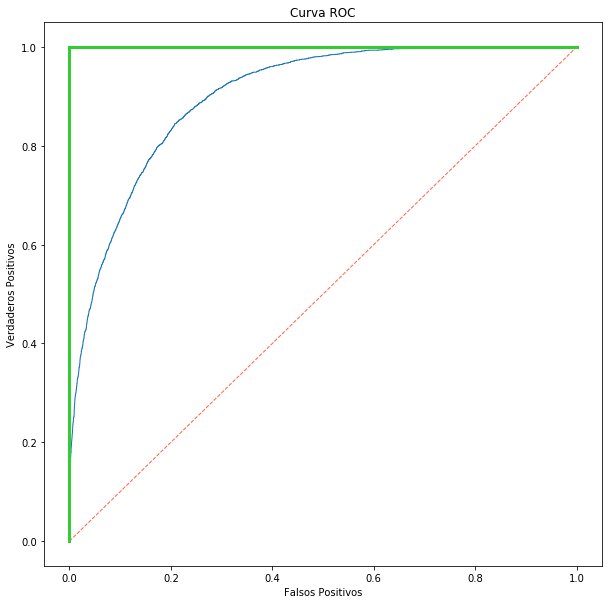

In [252]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
plt.figure(figsize=(10, 10))
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1, c='tomato')
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
auc_score = roc_auc_score(y_test, yhat_pr)
print("El área bajo la curva es de {}".format(auc_score))

### Modelo 2: Se consideran variables al 95% de confianza y con balanceo de clases
* Se estandariza la matriz de atributos.
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción de las clases y de la probabilidad.
* Se reporta las métricas de precision, recall y f1 para ambas clases.
* Se grafica la curva Receiver Operator Characteristic.

In [253]:
std_matrix = StandardScaler().fit_transform(df_model.loc[:, 'age':'asia'])
X_train, X_test, y_train, y_test = train_test_split(std_matrix, df_model['income_bin'], test_size=.33, random_state=11238)
default_model = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
yhat = default_model.predict(X_test)
yhat_pr = default_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, yhat))

/Users/julio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.79      0.86     11190
           1       0.57      0.84      0.68      3734

    accuracy                           0.80     14924
   macro avg       0.76      0.82      0.77     14924
weighted avg       0.85      0.80      0.81     14924



El área bajo la curva es de 0.9008911899588975


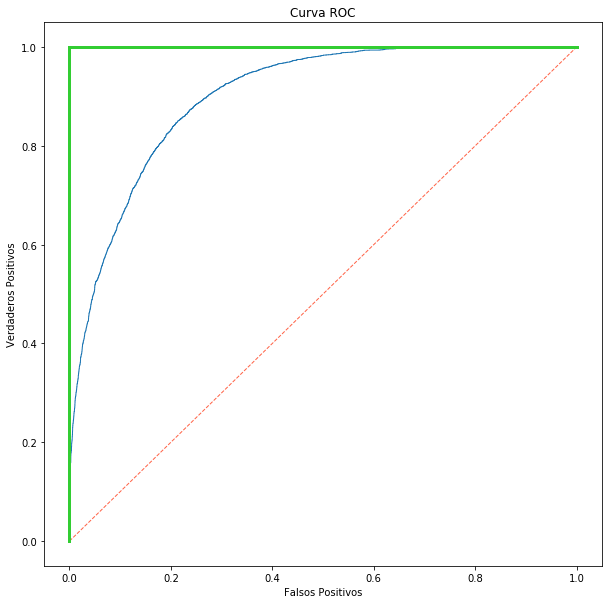

In [254]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
plt.figure(figsize=(10, 10))
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1, c='tomato')
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
auc_score = roc_auc_score(y_test, yhat_pr)
print("El área bajo la curva es de {}".format(auc_score))

### Modelo 3: Se considera la variable age como variable independiente
* Se estandariza la matriz de atributos.
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción de las clases y de la probabilidad.
* Se reporta las métricas de precision, recall y f1 para ambas clases.
* Se grafica la curva Receiver Operator Characteristic.

In [336]:
std_matrix = StandardScaler().fit_transform(df_model.loc[:, ['age']])
X_train, X_test, y_train, y_test = train_test_split(std_matrix, df_model['income_bin'], test_size=.33, random_state=11238)
default_model = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
yhat = default_model.predict(X_test)
yhat_pr = default_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73     11190
           1       0.36      0.60      0.45      3734

    accuracy                           0.64     14924
   macro avg       0.60      0.62      0.59     14924
weighted avg       0.71      0.64      0.66     14924



/Users/julio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


El área bajo la curva es de 0.6810971733791313


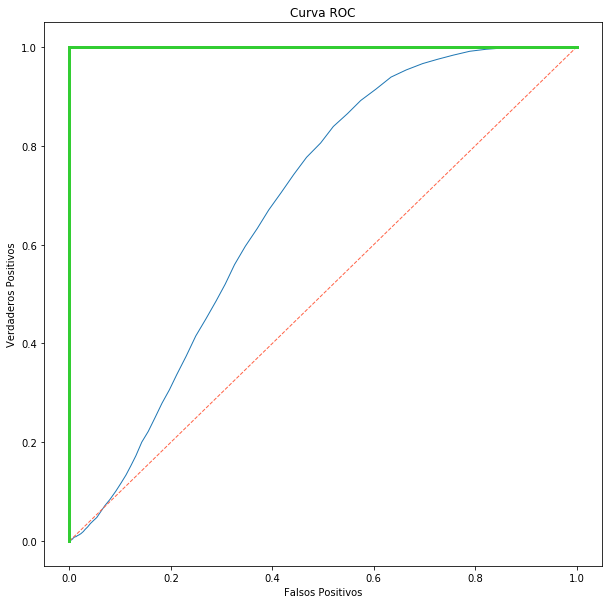

In [337]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)
plt.figure(figsize=(10, 10))
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1, c='tomato')
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
auc_score = roc_auc_score(y_test, yhat_pr)
print("El área bajo la curva es de {}".format(auc_score))

### Conclusiones
#### Modelo 1
El modelo considera 22 variables independientes que corresponden a las que explican a la variable dependiente al 95% de confianza. El modelo presenta indicadores de precision, recall y f1 adecuados para ambas clases. La curva ROC se sitúa bastante por encima de la bisectriz por lo cual confirma los indicadores obtenidos y el área bajo la curva corresponde al 0.90 por lo que supera en un 40% a una decisión al azar. El problema que presenta este modelo tiene que ver con el performance debido a la alta cantidad de variables consideradas.

#### Modelo 2
El modelo considera 22 variables independientes que corresponden a las que explican a la variable dependiente al 95% de confianza. Este modelo es una variación del Modelo 1 al utilizar balanceo de clases en el algoritmo de regresión logística, dada la alta diferencia muestral entre datos con clase 0 y clase 1. El modelo presenta indicadores de precision, recall y f1 adecuados para ambas clases. La curva ROC se sitúa bastante por encima de la bisectriz por lo cual confirma los indicadores obtenidos y el área bajo la curva corresponde al 0.90 por lo que supera en un 40% a una decisión al azar. Al igual que el Modelo 1, el problema que presenta este modelo tiene que ver con el performance debido a la alta cantidad de variables consideradas. Al utilizar balanceo de clases no se obtuvo mejoras considerables en los indicadores medidos.

#### Modelo 3
El modelo considera sólo a la variable age (Edad del individuo) para predecir si el ingreso anual será inferior o superior a 50000. Además se utiliza balanceo de clases en el algoritmo de regresión logística dada la alta diferencia muestral entre datos con clase 0 y clase 1. El modelo presenta indicadores de precision, recall y f1 adecuados pero inferiores a los modelos 1 y 2. La curva ROC se sitúa por encima de la bisectriz por lo cual confirma los indicadores obtenidos y el área bajo la curva corresponde al 0.68 por lo que supera en un 18% a una decisión al azar. Este modelo es bastante mejor en términos de rendimiento al Modelo 1 y 2, debido a que considera una sola variable a diferencia de 22. En terminos de indicadores estadísticos es inferior a los modelos anteriores.